<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [ ]:

train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [ ]:
image_size = (299, 299)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [ ]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [ ]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [ ]:
from keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
from keras.utils import to_categorical

In [ ]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [ ]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5722, 299, 299, 3)
y_train shape: (5722,)
X_test shape: (1311, 299, 299, 3)
y_test shape: (1311,)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:
# # model_CNN = tf.keras.Sequential()
# # model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

# # model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Flatten())
# # model_CNN.add(layers.Dense(2048, activation='relu'))
# # model_CNN.add(layers.Dropout(0.25))
# # model_CNN.add(layers.Dense(4, activation='softmax'))

# # optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# # model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# class VGG16:

#     def build(shape, classes):
#         model_CNN = Sequential()
#         model_CNN.add(Conv2D(input_shape=shape,filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Flatten())
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=classes, activation="softmax"))
#         return model_CNN


# build the network
num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (299, 299, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 activation (Activation)     (None, 297, 297, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 146, 146, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                  

In [ ]:
# # compile the model to use categorical cross-entropy loss function and adadelta optimizer
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=1,
#                     validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





In [ ]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.xception import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Mox = Xception(weights='imagenet', include_top=True)
Mox.summary()

91884032/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
# make a reference to MobileNets's input layer
inp = Mox.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in MobileNets, and make a reference to it
out = new_classification_layer(Mox.layers[-2].output)

# create a new network between inp and out
model_mox = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_mox.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_mox.layers[-1:]):
    layer.trainable = True

model_mox.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_mox.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
history7 = model_mox.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=256,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
23/23 [==============================] - 115s 3s/step - loss: 1.8269 - accuracy: 0.3895 - val_loss: 1.1842 - val_accuracy: 0.5614
Epoch 2/50
23/23 [==============================] - 67s 3s/step - loss: 0.9092 - accuracy: 0.6582 - val_loss: 0.8579 - val_accuracy: 0.6827
Epoch 3/50
23/23 [==============================] - 67s 3s/step - loss: 0.7068 - accuracy: 0.7480 - val_loss: 0.7433 - val_accuracy: 0.7292
Epoch 4/50
23/23 [==============================] - 57s 3s/step - loss: 0.6133 - accuracy: 0.7838 - val_loss: 0.6631 - val_accuracy: 0.7590
Epoch 5/50
23/23 [==============================] - 66s 3s/step - loss: 0.5468 - accuracy: 0.8057 - val_loss: 0.6115 - val_accuracy: 0.7849
Epoch 6/50
23/23 [==============================] - 68s 3s/step - loss: 0.5007 - accuracy: 0.8216 - val_loss: 0.5668 - val_accuracy: 0.7963
Epoch 7/50
23/23 [==============================] - 57s 3s/step - loss: 0.4626 - accuracy: 0.8411 - val_loss: 0.5282 - val_accuracy: 0.8063
Epoch 8/50
23/23 [=

In [ ]:
loss, accuracy = model_mox.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.27022722363471985
Test accuracy: 0.9031273722648621


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:


# Assuming you have trained the model and have test data X_test, test_encoded_labels
predictions = model_mox.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 10s 218ms/step


In [ ]:

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       300
           1       0.78      0.88      0.83       306
           2       0.97      0.98      0.97       405
           3       0.94      0.96      0.95       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.90      0.90      1311



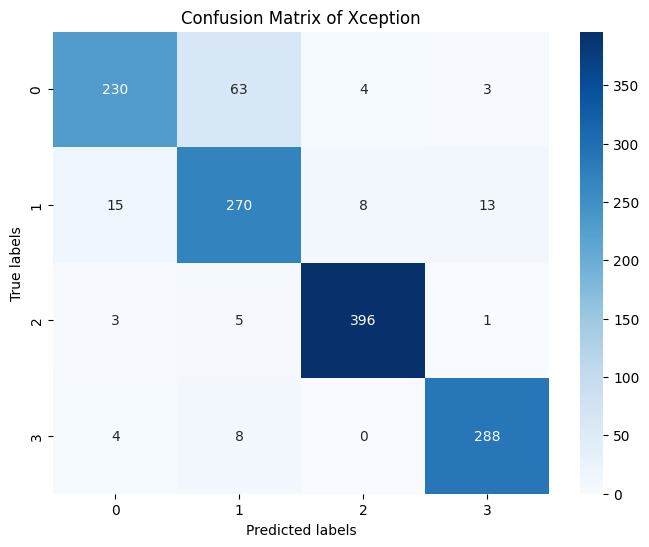

In [ ]:



# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Xception')
plt.show()


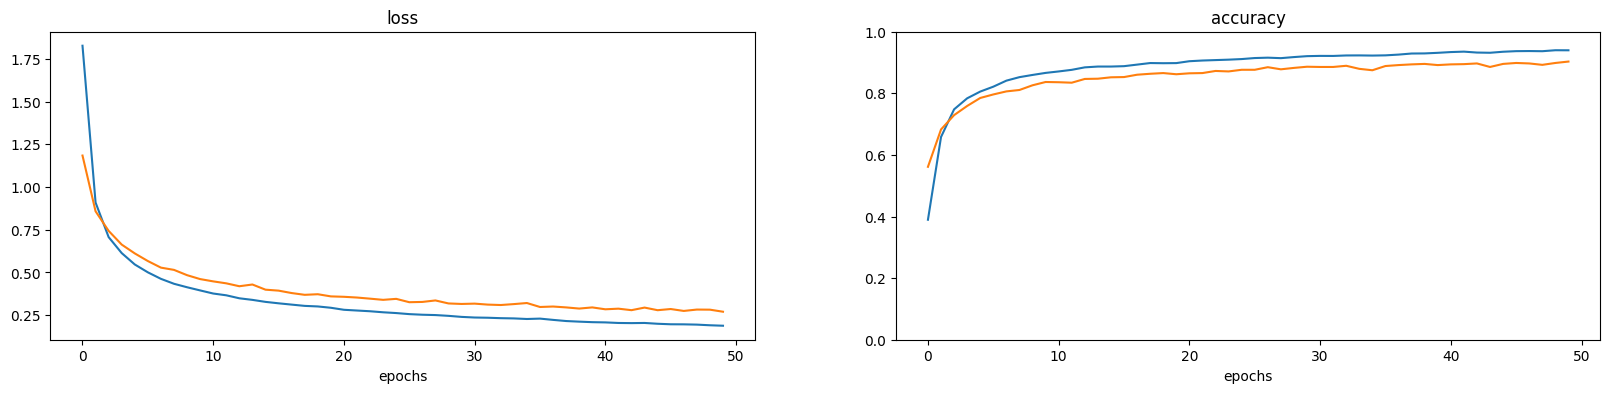

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history7.history["loss"])
ax.plot(history7.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history7.history["accuracy"])
ax2.plot(history7.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()